In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [3]:
dataset=pd.read_excel('review-details.xlsx')

In [5]:
input_data=dataset['review_text']
output_data=dataset['review_rating']
input_data.shape,output_data.shape

((2501,), (2501,))

In [7]:
input_data.head(5)
input_data.isnull().sum()
output_data.isnull().sum()
output_data.head()

0    5
1    5
2    4
3    5
4    5
Name: review_rating, dtype: int64

In [8]:
ps=PorterStemmer()
corpus=[]
for i in range(len(input_data)):
  review=re.sub('[^a-zA-Z]',' ',input_data[i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review]
  review=' '.join(review)
  corpus.append(review)

In [9]:
corpus[0]

'as you get older you know what you like and what is suitabl for your bodi i like all dove product give you that fresh all over wide awak feel and no dandruff or flakey skin no smelli a pit'

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,Bidirectional,Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

In [11]:
voc_size=10000
onehot_rep=[one_hot(word,voc_size) for word in corpus]

In [12]:
pad_size=100
emb_doc=pad_sequences(onehot_rep,padding='pre',maxlen=pad_size)

In [13]:
dim=50
model=Sequential()
model.add(Embedding(voc_size,dim,input_length=pad_size))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           500000    
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               120800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 1206      
Total params: 622,006
Trainable params: 622,006
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
from keras.utils import to_categorical
x_final= np.array(emb_doc)
y_fina_cat=np.array(output_data)
y_final=to_categorical(y_fina_cat)

In [15]:
x_final.shape,y_final.shape

((2501, 100), (2501, 6))

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_final,y_final,test_size=0.33,random_state=1)

In [17]:
fin_model=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=12,batch_size=16)

Epoch 1/12
105/105 [==============================] - 37s 323ms/step - loss: 1.1788 - accuracy: 0.6986 - val_loss: 0.8662 - val_accuracy: 0.7470
Epoch 2/12
105/105 [==============================] - 116s 1s/step - loss: 0.8182 - accuracy: 0.7491 - val_loss: 0.7204 - val_accuracy: 0.7627
Epoch 3/12
105/105 [==============================] - 174s 2s/step - loss: 0.6315 - accuracy: 0.7793 - val_loss: 0.6875 - val_accuracy: 0.7724
Epoch 4/12
105/105 [==============================] - 252s 2s/step - loss: 0.5669 - accuracy: 0.7985 - val_loss: 0.7043 - val_accuracy: 0.7785
Epoch 5/12
105/105 [==============================] - 354s 3s/step - loss: 0.4761 - accuracy: 0.8368 - val_loss: 0.7024 - val_accuracy: 0.7893
Epoch 6/12
105/105 [==============================] - 479s 5s/step - loss: 0.4179 - accuracy: 0.8445 - val_loss: 0.8721 - val_accuracy: 0.7518
Epoch 7/12
105/105 [==============================] - 742s 7s/step - loss: 0.3950 - accuracy: 0.8565 - val_loss: 0.7279 - val_accuracy: 0.77

In [18]:
y_pred=model.predict_classes(x_test)

c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:459: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [19]:
train_acc=model.evaluate(x_train,y_train,verbose=0)
test_acc=model.evaluate(x_test,y_test,verbose=0)
print('training accuraccy: {} \n test accuraccy: {}'.format(train_acc[1],test_acc[1]))

KeyboardInterrupt: 

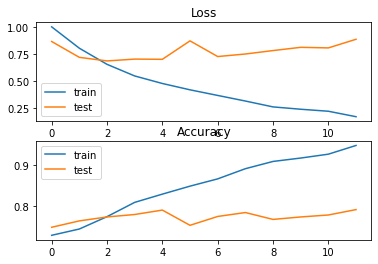

In [20]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(fin_model.history['loss'], label='train')
pyplot.plot(fin_model.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(fin_model.history['accuracy'], label='train')
pyplot.plot(fin_model.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [22]:
model.save('model.h5')

In [ ]:
from keras.models import load_model
model=load_model('model.h5')
from nltk.stem import WordNetLemmatizer
